### <font color='k'> Import Modules </font>

In [278]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

### <font color='k'> Read Dataset</font>

In [279]:
df=pd.read_csv("DatasetMain.csv")

### <font color='k'> Split Train and Test data </font>

In [280]:
X=df[['Position Order', 'Grid', 'Race']]
y=df['Name']

In [281]:
# Training data: Until year 2020
# Testing data: Year 2020

X_train=X[df['Year']<2020]
X_test=X[(df['Year']==2020) & (df['Position Order']==1)]

X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

y_train=y[df['Year']<2020]
y_test=y[(df['Year']==2020) & (df['Position Order']==1)]

y_axis=[]

In [282]:
LIST=[]
for i in X_test.columns:
    if i not in X_train.columns:
        LIST.append(i)
X_test.drop(LIST,axis=1,inplace=True)

### <font color='k'> Logistic Regression </font>

In [283]:
reg_model=LogisticRegression(C=0.01,max_iter=100000,multi_class='multinomial')
reg_model.fit(X_train,y_train)
score=reg_model.score(X_test,y_test)
y_axis.append(score)
print("Accuracy:",score)

Accuracy: 0.7647058823529411


### <font color='k'> Random Forest Classifier </font>

In [284]:
params={'criterion': ['gini', 'entropy'],
        'max_features': [0.8, 'auto', None],
        'max_depth': list(np.linspace(5, 55, 26)) + [None]}
scores={}

for criterion in params['criterion']:
    for max_features in params['max_features']:
        for max_depth in params['max_depth']:
            model_params = (criterion, max_features, max_depth)
            rfc_model = RandomForestClassifier(criterion = criterion, max_features = max_features, max_depth = max_depth)
            rfc_model.fit(X_train, y_train)
            
            scores[model_params]=rfc_model.score(X_test,y_test)
            
key=max(scores,key=lambda x:scores[x])
print(key)
print("Accuracy:",scores[key])
y_axis.append(scores[key])

('gini', 0.8, 9.0)
Accuracy: 0.8235294117647058


### <font color='k'> Bar graph of Accuracy </font>

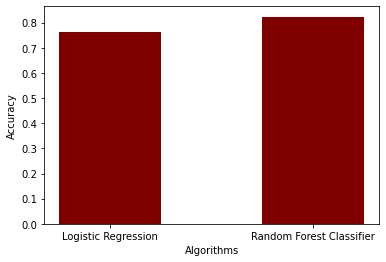

In [285]:
labels=['Logistic Regression','Random Forest Classifier']
plt.bar(x=labels,height=y_axis,width=0.5,label=labels,color='maroon')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()

### <font color='k'> Using the RFC Model </font>

In [286]:
rfc_model = RandomForestClassifier(criterion=key[0], max_features=key[1], max_depth=key[2])
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9.0, max_features=0.8)

In [287]:
df.drop(['Constructor Id','Name','Race Id', 'Result Id', 'F1'],axis=1,inplace=True)
df=df[(df['Year']==2020) & (df['Position Order']==1)]
df['Actual Winner']=list(y_test)
df['Predicted Winner']=list(rfc_model.predict(X_test))
df

,Race,Year,Grid,Position Order,Actual Winner,Predicted Winner
1775,Austrian Grand Prix,2020,1,1,Mercedes,Mercedes
1815,Styrian Grand Prix,2020,1,1,Mercedes,Mercedes
1835,Hungarian Grand Prix,2020,1,1,Mercedes,Mercedes
1855,British Grand Prix,2020,1,1,Mercedes,Mercedes
1875,70th Anniversary Grand Prix,2020,4,1,Red Bull,Red Bull
1895,Spanish Grand Prix,2020,1,1,Mercedes,Mercedes
1915,Belgian Grand Prix,2020,1,1,Mercedes,Mercedes
1935,Italian Grand Prix,2020,10,1,AlphaTauri,Mercedes
1955,Tuscan Grand Prix,2020,1,1,Mercedes,Mercedes
1975,Russian Grand Prix,2020,3,1,Mercedes,Mercedes
